In [1]:
%matplotlib inline
import matplotlib

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import discopt
import pandas as pd
import numpy as np

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
digits = sklearn.datasets.load_digits()
x = digits.data
y = digits.target

In [9]:
xtr, ytr, xval, yval, xte, yte = read_artificial_datasets('../datasets/artificial/polynomial_csv/poly1/')

In [10]:
def train_and_valid(clf):
    # put here trainig and return objective (accuracy, roc, F1, whatever you wish)
    # validation method is up to you
    # clf is xgboost.sklearn.XGBoostClassifier instance
    clf.fit(xtr, ytr)
    pred = clf.predict(xval)
    obj = -(pred == yval).mean() # accuracy
    return obj

In [12]:
scores = discopt.search_params_for_xgb(train_valid_func=train_and_valid, train_data_shape=xtr.shape)

worse -0.686 middle -0.6925 best -0.6925
positive freq 0.35
worse -0.6045 middle -0.686 best -0.6925
positive freq 0.14
worse -0.6045 middle -0.686 best -0.6925
positive freq 0.69
worse -0.6845 middle -0.6875 best -0.6925
positive freq 0.55
worse -0.683 middle -0.6875 best -0.6925
positive freq 0.2
worse -0.683 middle -0.6875 best -0.6925
positive freq 0.54
worse -0.6525 middle -0.686 best -0.6925
positive freq 0.42
worse -0.6525 middle -0.686 best -0.6925
positive freq 0.55
worse -0.6525 middle -0.686 best -0.6925
positive freq 0.26
worse -0.6525 middle -0.686 best -0.694
positive freq 0.48
worse -0.657 middle -0.686 best -0.694
positive freq 0.41
worse -0.657 middle -0.688 best -0.694
positive freq 0.32
worse -0.657 middle -0.688 best -0.709
positive freq 0.37
worse -0.679 middle -0.694 best -0.709
positive freq 0.07
worse -0.679 middle -0.694 best -0.709
positive freq 0.3
worse -0.675 middle -0.694 best -0.709
positive freq 0.07
worse -0.675 middle -0.694 best -0.709
positive freq 0

In [14]:
reload(discopt)

<module 'discopt' from 'discopt.pyc'>

In [15]:
scores.sort_values('obj')

,lr_trees_ratio,colsample_bytree,colsample_bylevel,max_depth,n_estimators,subsample,log_reg_lambda,log_gamma,obj
16,5.540962,0.621499,0.946642,6.0,252.0,0.770711,-1.542904,-4.135656,-0.7090
60,9.617702,0.942383,0.916188,2.0,294.0,0.641881,-3.878899,-1.721361,-0.7080
200,7.403787,0.802562,0.886905,2.0,287.0,0.735765,-2.033877,-2.131852,-0.7070
193,9.490495,0.756093,0.831803,2.0,145.0,0.724404,-3.810439,-2.013400,-0.7050
154,4.616065,0.915661,0.977244,8.0,222.0,0.458391,0.280016,-2.821043,-0.7045
125,6.410418,0.936720,0.705632,8.0,206.0,0.541505,0.346834,-2.799036,-0.7045
190,7.007800,0.738086,0.880942,2.0,255.0,0.570384,-2.839809,0.826083,-0.7040
164,9.053889,0.601451,0.378722,2.0,178.0,0.426065,0.439940,-3.016286,-0.7035
31,8.631492,0.556137,0.796359,2.0,204.0,0.527726,-2.455700,-1.966444,-0.7030
203,8.178676,0.565706,0.806935,2.0,133.0,0.750098,-3.610183,-2.060214,-0.7025


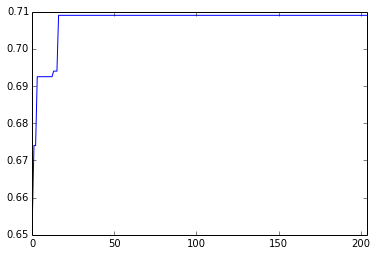

In [16]:
(-scores.obj).rolling(10000,1).max().plot()